In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler ,StandardScaler

In [2]:
data=pd.read_csv("train.csv")

In [3]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [6]:
data.duplicated().sum()

0

In [7]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
data.dropna(subset=["Item_Weight","Outlet_Size"],inplace = True)

In [9]:
data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [10]:
data[data.duplicated()]
#data=data.drop_duplicates()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [11]:
#Script to find the outliers
for col_name in data.select_dtypes(include=np.number).columns[:-1]:
    print(col_name)
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    print("Outliers = ",data.loc[(data[col_name] < low) | (data[col_name] > high), col_name])

Item_Weight
Outliers =  Series([], Name: Item_Weight, dtype: float64)
Item_Visibility
Outliers =  74      0.186357
126     0.183507
281     0.186033
632     0.188323
665     0.184690
910     0.184844
1371    0.184042
1646    0.183295
1753    0.186148
2297    0.186616
2317    0.182938
2751    0.185705
3003    0.187850
3181    0.187523
3520    0.183260
4425    0.183688
4914    0.183142
5573    0.185597
6020    0.184255
6600    0.185131
6660    0.184454
6830    0.183473
7207    0.184168
7493    0.185824
7642    0.183580
7839    0.186068
7905    0.186826
7973    0.187559
Name: Item_Visibility, dtype: float64
Item_MRP
Outliers =  Series([], Name: Item_MRP, dtype: float64)
Outlet_Establishment_Year
Outliers =  Series([], Name: Outlet_Establishment_Year, dtype: int64)


In [12]:
data["Item_Visibility"]

0       0.016047
1       0.019278
2       0.016760
4       0.000000
5       0.000000
          ...   
8517    0.083607
8518    0.056783
8520    0.035186
8521    0.145221
8522    0.044878
Name: Item_Visibility, Length: 4650, dtype: float64

(array([785., 981., 786., 587., 476., 343., 284., 174., 140.,  94.]),
 array([0.        , 0.01883227, 0.03766453, 0.0564968 , 0.07532907,
        0.09416133, 0.1129936 , 0.13182586, 0.15065813, 0.1694904 ,
        0.18832266]),
 <BarContainer object of 10 artists>)

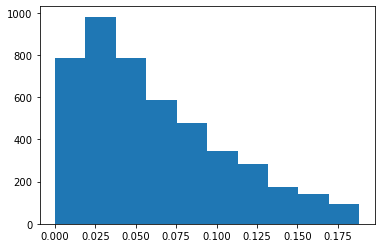

In [13]:
plt.hist(data["Item_Visibility"])

In [14]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [15]:
data["Item_Identifier"].value_counts()

FDW49    5
FDF22    5
FDY55    5
FDA21    5
FDM04    5
        ..
FDO03    1
FDJ07    1
FDZ19    1
DRL59    1
FDV31    1
Name: Item_Identifier, Length: 1535, dtype: int64

In [16]:
data["Item_Weight"].value_counts()

12.150    58
17.600    55
13.650    49
11.800    49
16.000    45
          ..
6.775      1
5.000      1
7.070      1
4.905      1
7.560      1
Name: Item_Weight, Length: 409, dtype: int64

In [17]:
data["Item_Fat_Content"].value_counts()

Low Fat    2774
Regular    1575
LF          177
reg          71
low fat      53
Name: Item_Fat_Content, dtype: int64

In [18]:
data["Item_Fat_Content"].replace({'low fat': 'Low Fat','LF': 'Low Fat','reg': 'Regular'},inplace= True)

In [19]:
data["Item_Fat_Content"].value_counts()

Low Fat    3004
Regular    1646
Name: Item_Fat_Content, dtype: int64

In [20]:
data["Item_Visibility"].value_counts()

0.000000    292
0.076975      3
0.112399      2
0.112203      2
0.061271      2
           ... 
0.030122      1
0.025969      1
0.169776      1
0.094308      1
0.084436      1
Name: Item_Visibility, Length: 4280, dtype: int64

In [21]:
data["Item_Type"].value_counts()

Fruits and Vegetables    670
Snack Foods              656
Household                498
Frozen Foods             477
Dairy                    380
Canned                   361
Baking Goods             351
Health and Hygiene       277
Soft Drinks              241
Meat                     221
Breads                   132
Hard Drinks              117
Others                    91
Starchy Foods             87
Breakfast                 58
Seafood                   33
Name: Item_Type, dtype: int64

In [22]:
data["Item_MRP"].value_counts()

142.0154    6
100.1016    4
172.0422    4
146.9102    4
105.4622    3
           ..
174.4422    1
108.2280    1
168.6158    1
96.4094     1
42.0138     1
Name: Item_MRP, Length: 3806, dtype: int64

In [23]:
data["Outlet_Identifier"].value_counts()

OUT013    932
OUT049    930
OUT035    930
OUT046    930
OUT018    928
Name: Outlet_Identifier, dtype: int64

In [24]:
data["Outlet_Establishment_Year"].value_counts()

1987    932
1999    930
1997    930
2004    930
2009    928
Name: Outlet_Establishment_Year, dtype: int64

In [25]:
data["Outlet_Size"].value_counts()

Small     1860
Medium    1858
High       932
Name: Outlet_Size, dtype: int64

In [26]:
data["Outlet_Location_Type"].value_counts()

Tier 3    1860
Tier 1    1860
Tier 2     930
Name: Outlet_Location_Type, dtype: int64

In [27]:
data["Outlet_Type"].value_counts()

Supermarket Type1    3722
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [28]:
data["Item_Outlet_Sales"].value_counts()

1342.2528    11
1438.1280    11
703.0848     10
958.7520     10
1416.8224     9
             ..
1751.0540     1
5077.3908     1
2403.5380     1
600.5516      1
6385.0220     1
Name: Item_Outlet_Sales, Length: 2449, dtype: int64

In [29]:
data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4650 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            4650 non-null   object 
 1   Item_Weight                4650 non-null   float64
 2   Item_Fat_Content           4650 non-null   object 
 3   Item_Visibility            4650 non-null   float64
 4   Item_Type                  4650 non-null   object 
 5   Item_MRP                   4650 non-null   float64
 6   Outlet_Identifier          4650 non-null   object 
 7   Outlet_Establishment_Year  4650 non-null   int64  
 8   Outlet_Size                4650 non-null   object 
 9   Outlet_Location_Type       4650 non-null   object 
 10  Outlet_Type                4650 non-null   object 
 11  Item_Outlet_Sales          4650 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 472.3+ KB


In [31]:
data.select_dtypes(include=np.number)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
4,8.930,0.000000,53.8614,1987,994.7052
5,10.395,0.000000,51.4008,2009,556.6088
...,...,...,...,...,...
8517,20.750,0.083607,178.8318,1997,3608.6360
8518,6.865,0.056783,214.5218,1987,2778.3834
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


In [32]:
data.select_dtypes(exclude=np.number)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
5,FDP36,Regular,Baking Goods,OUT018,Medium,Tier 3,Supermarket Type2
...,...,...,...,...,...,...,...
8517,FDF53,Regular,Frozen Foods,OUT046,Small,Tier 1,Supermarket Type1
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [33]:
numerical_data=data.select_dtypes(include=np.number)
categorical_data =data.select_dtypes(exclude=np.number)

In [34]:
#Performng standard scaling
from sklearn.preprocessing import StandardScaler
 
std_scale = StandardScaler()
df_std = std_scale.fit_transform(numerical_data)

In [35]:
numerical_data_preprocessed = pd.DataFrame(df_std,columns = numerical_data.columns)

In [36]:
categorical_data_processed = pd.get_dummies(categorical_data)

In [37]:
pre_processed_data = pd.concat([numerical_data_preprocessed,categorical_data_processed], axis = 1)

In [38]:
pre_processed_data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,...,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2
0,-0.770517,-1.001154,1.731874,-0.025790,0.976831,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-1.494212,-0.928714,-1.497218,1.327755,-1.220864,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.985195,-0.985173,-0.001575,-0.025790,-0.116683,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.849738,-1.360945,-1.407620,-1.650045,-0.852804,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.536065,-1.360945,-1.447044,1.327755,-1.145296,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8517,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
8518,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
8520,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
8521,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [40]:
pre_processed_data1=pre_processed_data.T

In [41]:
pre_processed_data1

,0,1,2,3,4,5,6,7,8,9,...,8511,8512,8513,8515,8516,8517,8518,8520,8521,8522
Item_Weight,-0.770517,-1.494212,0.985195,-0.849738,-0.536065,0.160867,-0.235239,1.199306,0.471328,1.006606,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Visibility,-1.001154,-0.928714,-0.985173,-1.360945,-1.360945,-1.075281,-1.360945,-0.341617,0.881424,-0.301404,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_MRP,1.731874,-1.497218,-0.001575,-1.407620,-1.447044,-1.346777,-1.540943,0.038355,0.060279,-0.353097,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Establishment_Year,-0.025790,1.327755,-0.025790,-1.650045,1.327755,-1.650045,-0.025790,-0.296499,-0.025790,-0.296499,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Outlet_Sales,0.976831,-1.220864,-0.116683,-0.852804,-1.145296,-1.287542,-0.504746,-0.056673,-0.455849,-0.084677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Outlet_Location_Type_Tier 1,1.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
Outlet_Location_Type_Tier 2,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Outlet_Location_Type_Tier 3,0.000000,1.000000,0.000000,NaN,1.000000,1.000000,1.000000,NaN,NaN,NaN,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
Outlet_Type_Supermarket Type1,1.000000,0.000000,1.000000,NaN,1.000000,0.000000,1.000000,NaN,NaN,NaN,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
